Introduction About the Data:
We have train (8523) and test (5681) data set, train data set has both input and output
variable(s). The Goal is to predict the sales for test data set.

There are 11 independent variables (including id):
-Item_Identifier: Unique product ID
-Item_Weight: Weight of product
-Item_Fat_Content: Whether the product is low fat or not
-Item_Visibility: The % of total display area of all products in a store allocated to the
                   particular product
-Item_Type: The category to which the product belongs
-Item_MRP: Maximum Retail Price (list price) of the product
-Outlet_Identifier: Unique store ID
-Outlet_Establishment_Year: The year in which store was established
-Outlet_Size: The size of the store in terms of ground area covered
-Outlet_Location_Type: The type of city in which the store is located
-Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Target variable:
-Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome
                    variable to be predicted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings


warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv("Data\Train.csv")

In [3]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3102,DRL35,15.70,Low Fat,0.030751,Hard Drinks,42.5770,OUT049,1999,Medium,Tier 1,Supermarket Type1,952.0940
7441,FDO08,11.10,Regular,0.053765,Fruits and Vegetables,163.1526,OUT035,2004,Small,Tier 2,Supermarket Type1,1808.9786
6149,FDC17,12.15,Low Fat,0.015461,Frozen Foods,211.8928,OUT046,1997,Small,Tier 1,Supermarket Type1,5890.9984
6491,FDQ15,20.35,Regular,0.150948,Meat,81.0276,OUT013,1987,High,Tier 3,Supermarket Type1,1868.2348
5606,DRK11,NaN,Low Fat,0.018847,Hard Drinks,148.0392,OUT019,1985,Small,Tier 1,Grocery Store,447.4176


In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can observe that we are having:

-2410 missing values in the Outlet_Size feature which is a categorical feature.
-1463 missing values in the Item_Weight feature
-For dealing with missing values, you'll need to use our intuition. Generally to figure out why the values are missing, we can ask     ourself:

Are these values missing because they weren't recorded or because they does't exist?

Doesn't exist : then we can keep them as NaN or simply drop them.
Weren't recorded: then we can do imputation using different techniques. I'll choose between mean and mode imputation.

In [8]:
df.duplicated().sum()

0

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

We have 7 categorical features : ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [10]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Item_Identifier
FDW13    0.117330
FDG33    0.117330
NCY18    0.105597
FDD38    0.105597
DRE49    0.105597
           ...   
FDY43    0.011733
FDQ60    0.011733
FDO33    0.011733
DRF48    0.011733
FDC23    0.011733
Name: proportion, Length: 1559, dtype: float64
---------------------------
Item_Fat_Content
Low Fat    59.709023
Regular    33.896515
LF          3.707615
reg         1.372756
low fat     1.314091
Name: proportion, dtype: float64
---------------------------
Item_Type
Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.

Insights

-case_id have unique vlaues for each column which can be dropped as it it of no importance
-The Item_Fat_Content column must be cleaned because there are some entry errors:
'Low Fat', 'low fat' and 'LF' should be the same category
Similarly 'Regular' and 'reg' should the same Another remarq in this column is that 'Low Fat' item category is greater than 'Regular' one.
-There are 16 different categories in the the Item_type feature. I think it's a lot. May be in the feature engineering section we can try to group them into categories. For example grouping:

'Soft Drinks' and 'Hard Drinks' into a 'Drinks' category or
'Snack Foods', 'Frozen Foods', 'Snarchy Foods' and 'Seafood' into a 'Foods' category.

In [11]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [12]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [13]:
df["Item_Type"] = df["Item_Type"].replace({'Soft Drinks': 'Drinks', 'Frozen Foods': 'Drinks',})
df["Item_Type"] = df["Item_Type"].replace({'Snack Foods': 'Foods', 'Hard Drinks': 'Foods','Starchy Foods':'Foods','Seafood':'Foods'})

In [14]:
df["Item_Type"].unique()

array(['Dairy', 'Drinks', 'Meat', 'Fruits and Vegetables', 'Household',
       'Baking Goods', 'Foods', 'Breakfast', 'Health and Hygiene',
       'Canned', 'Breads', 'Others'], dtype=object)

In [15]:
df_cleaned_data=df.to_csv('cleaned_data.csv',index=False)

Numerical Features

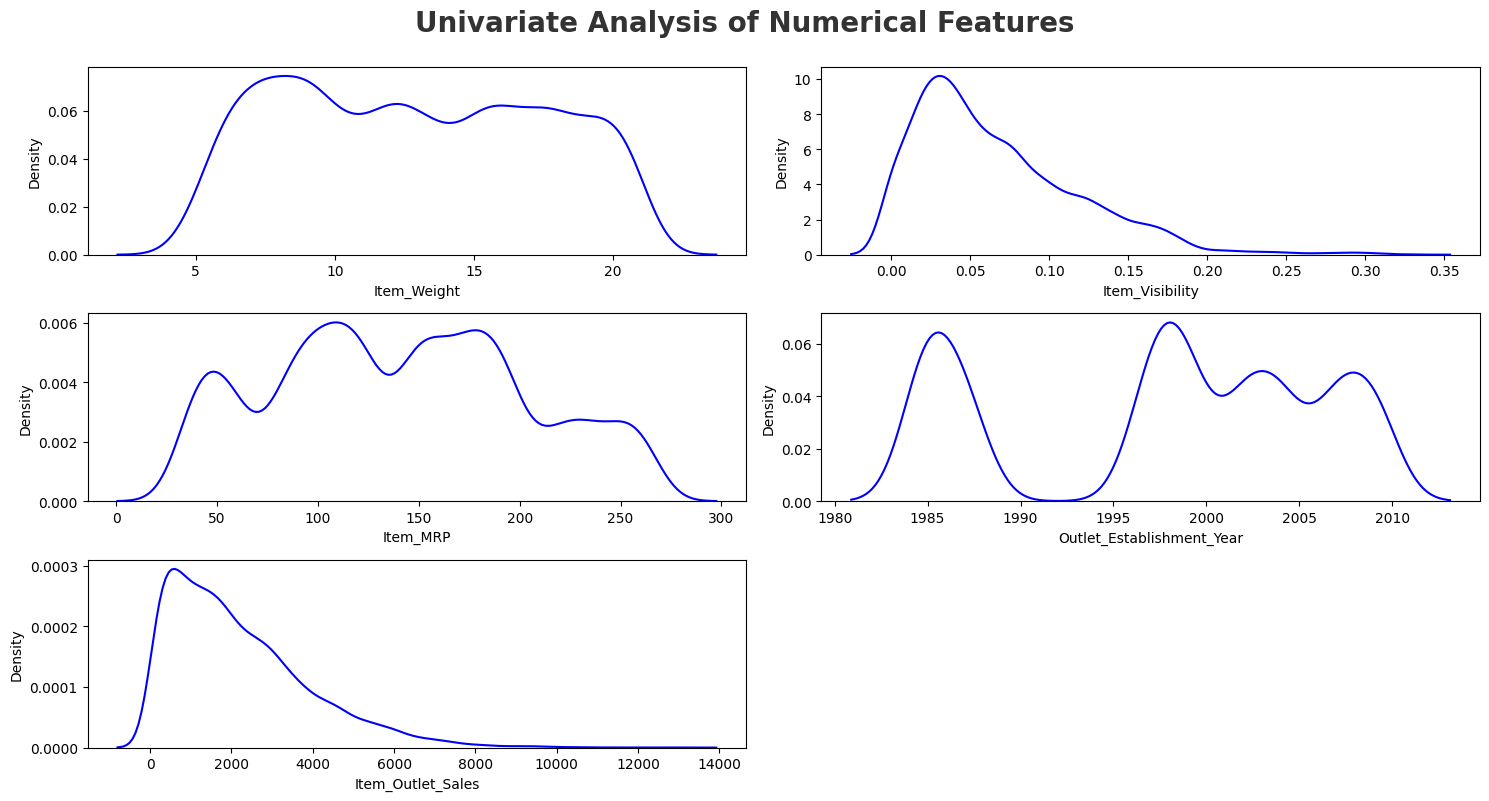

In [16]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
plt.tight_layout()

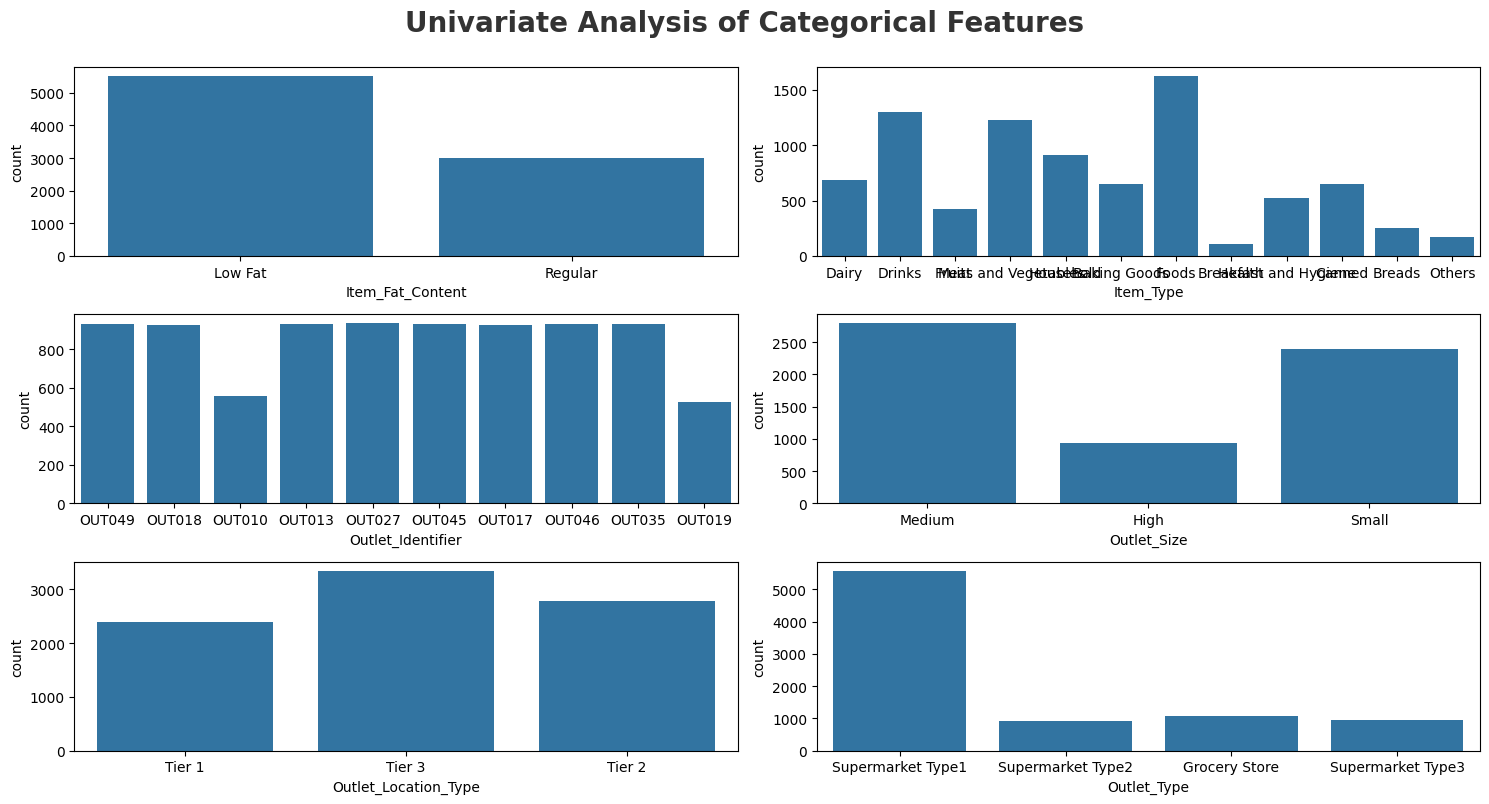

In [17]:
# categorical columns
categorical_features.remove('Item_Identifier')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

-The counts for ‘Low Fat’ and ‘Regular’ are significantly different, indicating a 'Low Fat' products are a potential high in demand.
-The distribution shows varying counts for each outlet, suggesting that some outlets have more product sales than others. This could be important for understanding outlet-specific trends.




In [18]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 1 discrete features : ['Outlet_Establishment_Year']

We have 4 continuous_features : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [19]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
median_value = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_value, inplace=True)
df['Item_Weight'].isnull().sum()


0

In [21]:
most_frequent_value = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(most_frequent_value, inplace=True)

In [22]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

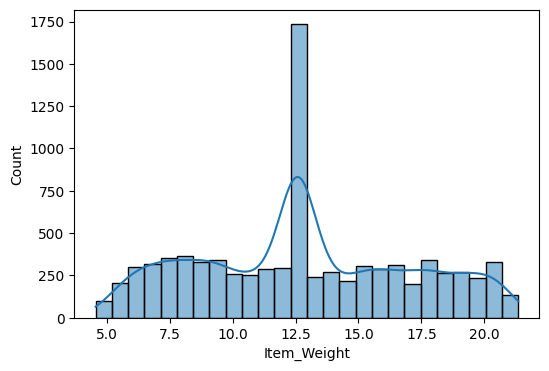

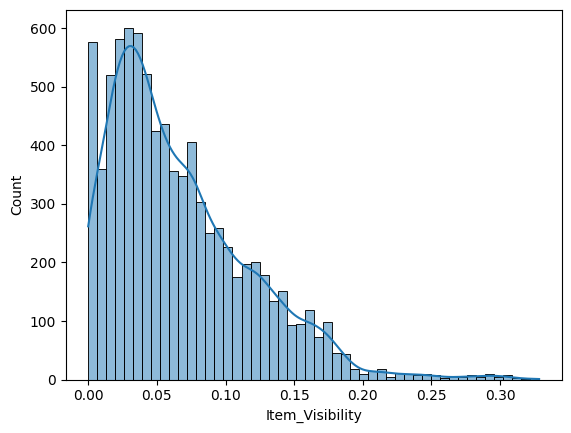

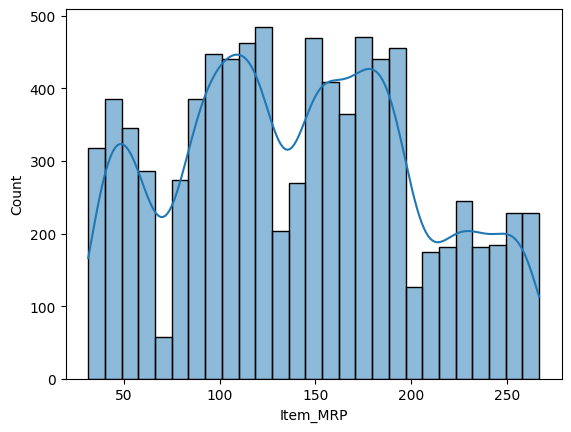

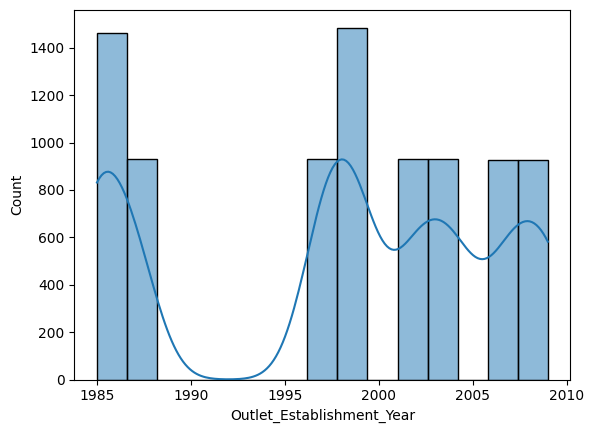

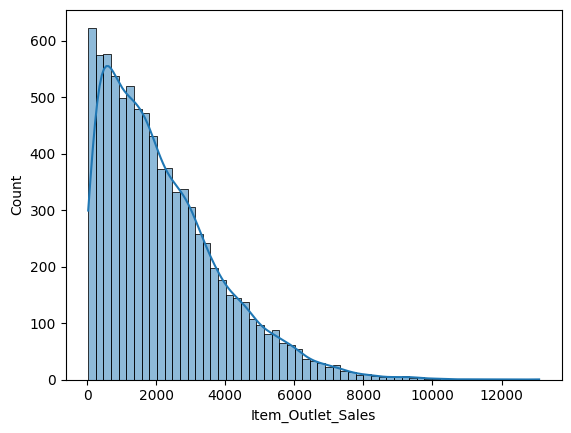

In [23]:
plt.figure(figsize=(6,4))


for col in numeric_features:
    sns.histplot(data=df,x=col,kde=True)
    print("\n")
    plt.show()

<Axes: >

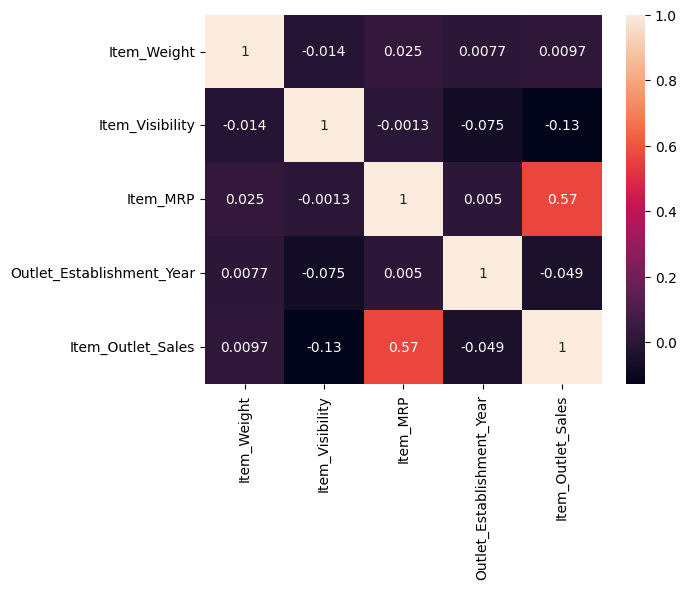

In [24]:
sns.heatmap(df[numeric_features].corr(),annot=True)

-any Correlation is found between target Variable

In [25]:
numeric_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [26]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


Visualization

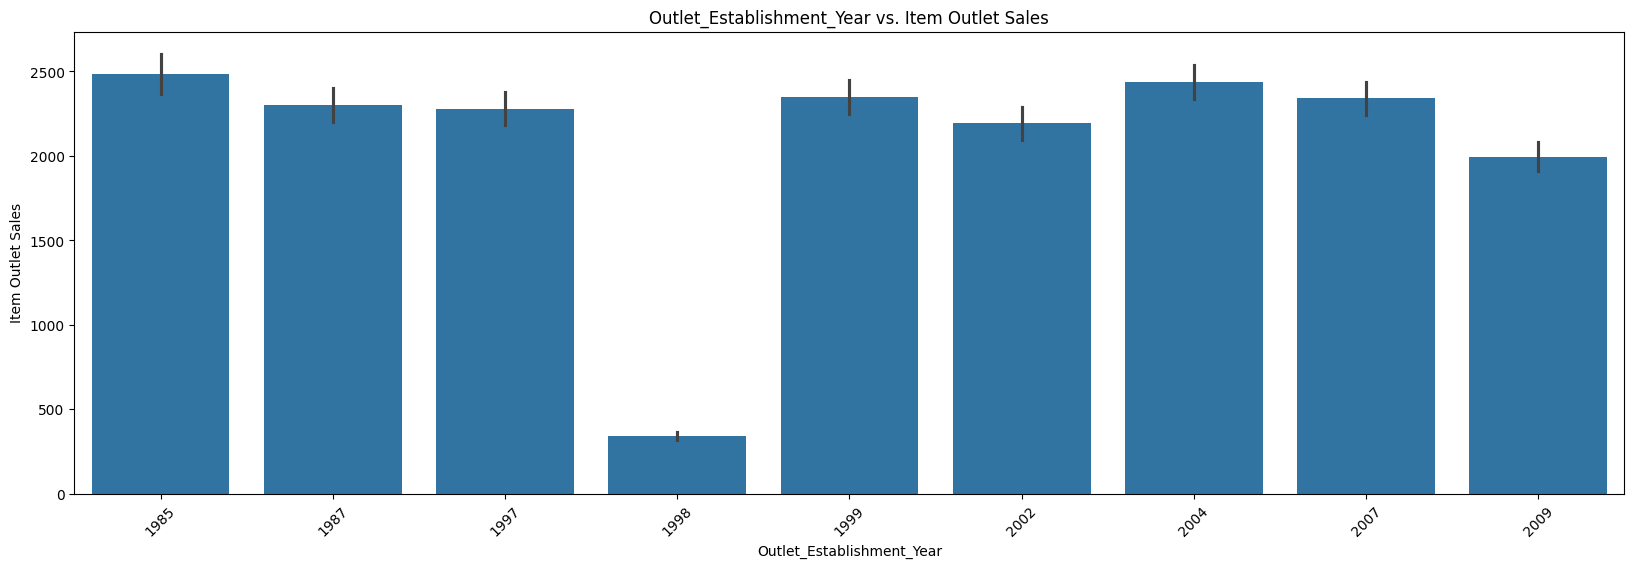

In [27]:
#'Outlet_Establishment_Year vs. Item Outlet Sales'
plt.figure(figsize=(20, 6))
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df)
plt.title('Outlet_Establishment_Year vs. Item Outlet Sales')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

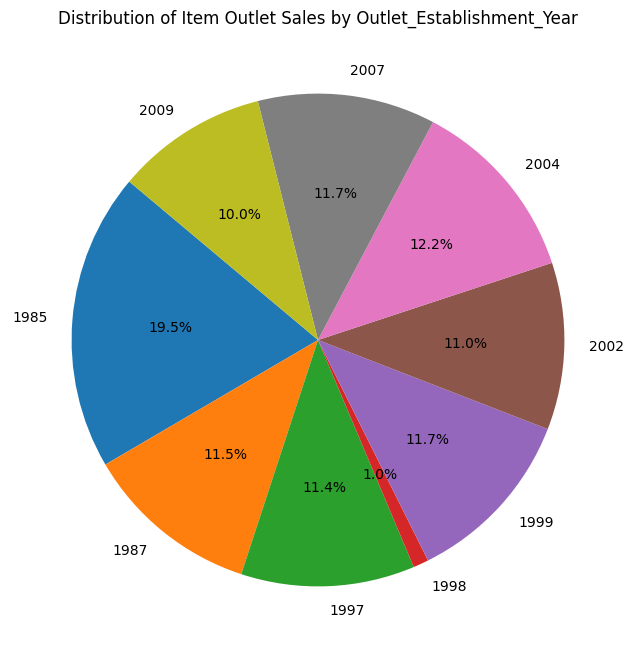

In [28]:
grouped_data = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(15, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Item Outlet Sales by Outlet_Establishment_Year')
plt.show()

-Insights:
The outlets from 1985 are possibly more established, which may contribute to their better performance in terms of sales.
The very low sales in 1998 might require further investigation. Possible reasons for the drop could be market conditions at the time, management practices, or changes in customer preferences.
For outlets established after 2000, sales seem to decrease gradually, with the lowest sales for outlets from 2009.

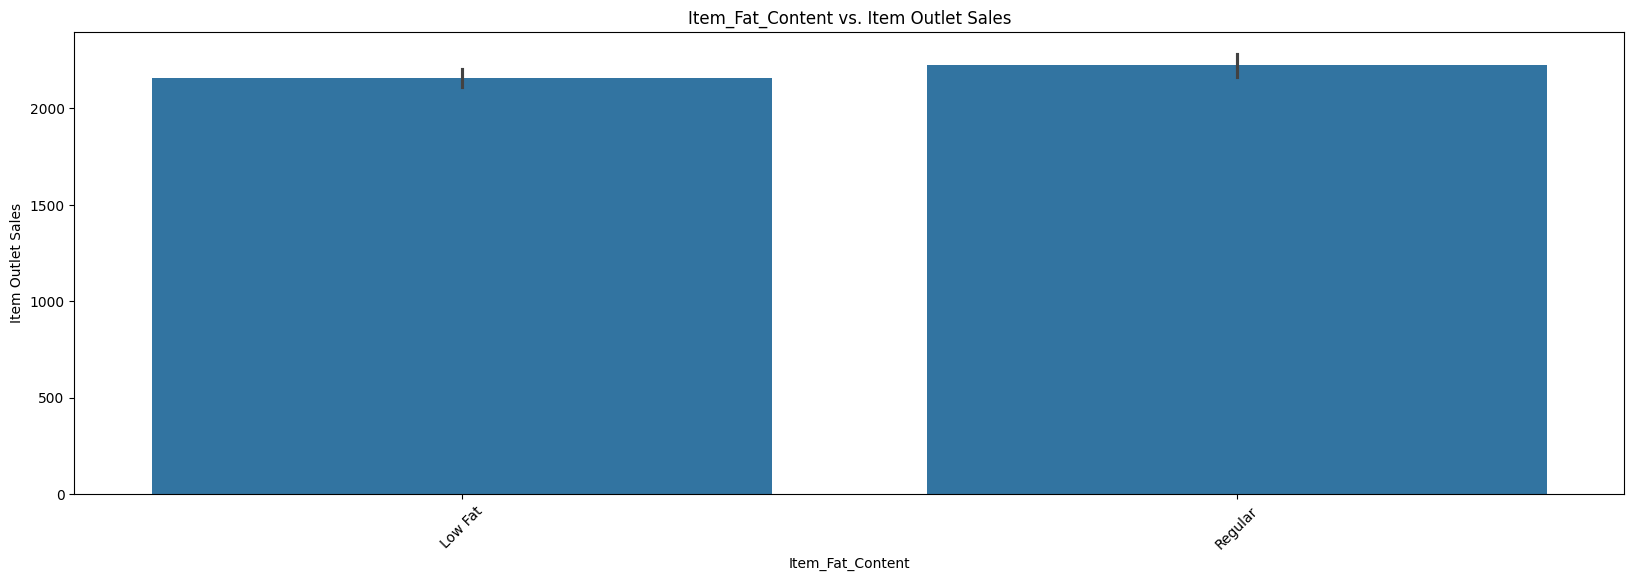

In [29]:
#'Item_Fat_Content vs. Item Outlet Sales'
plt.figure(figsize=(20, 6))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.title('Item_Fat_Content vs. Item Outlet Sales')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

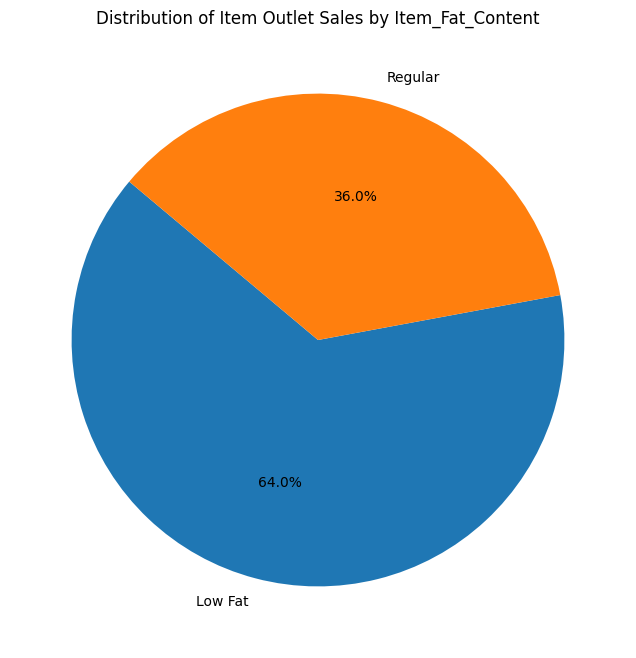

In [30]:
grouped_data = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(15, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Item Outlet Sales by Item_Fat_Content')
plt.show()

Insight
-The majority of the sales come from Low Fat products, which suggests that low-fat items are more popular or generate more revenue in the dataset.
 This could be due to consumer preference for healthier, low-fat options or a wider variety of low-fat products available for sale.
-While Regular Fat products contribute a smaller share of the sales (36%), it is still a significant portion, indicating that these products also have a steady demand.

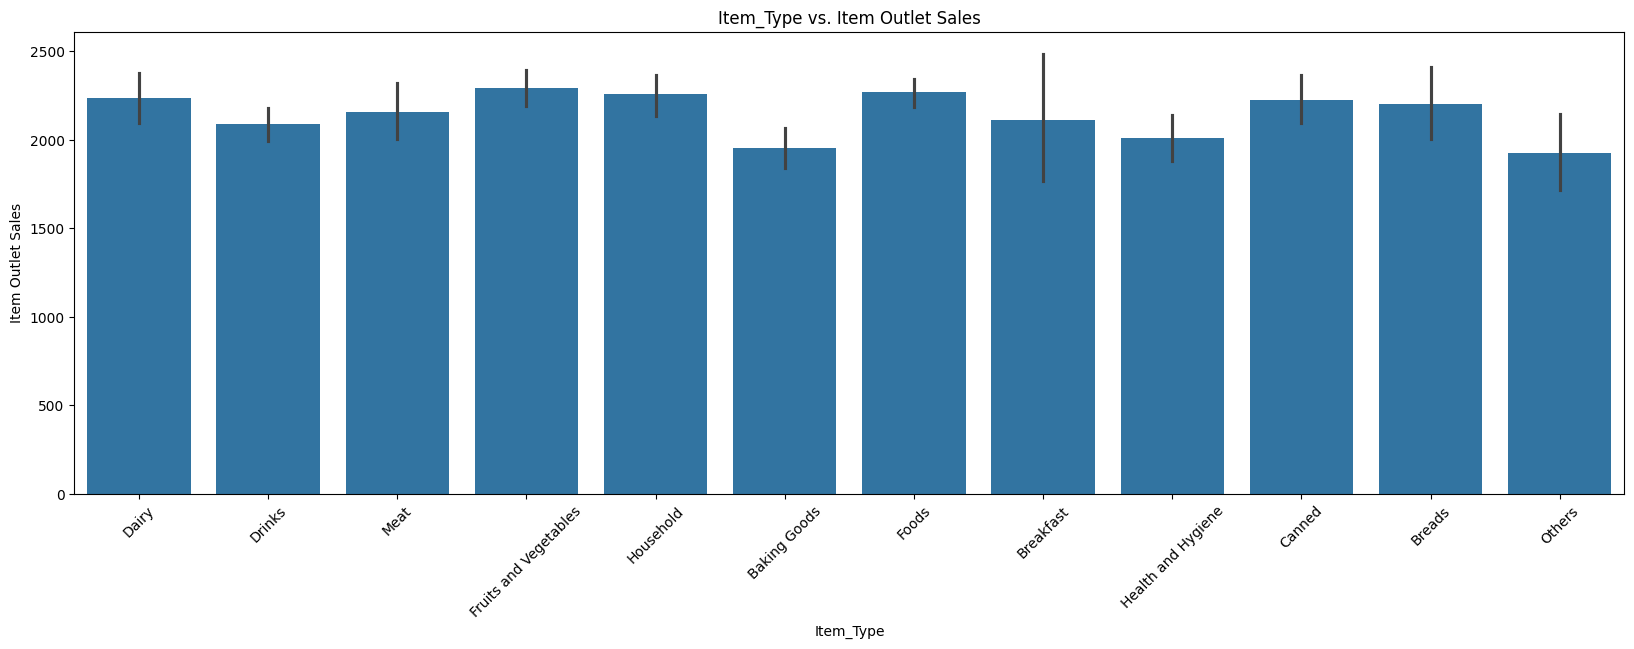

In [31]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.title('Item_Type vs. Item Outlet Sales')
plt.xlabel('Item_Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

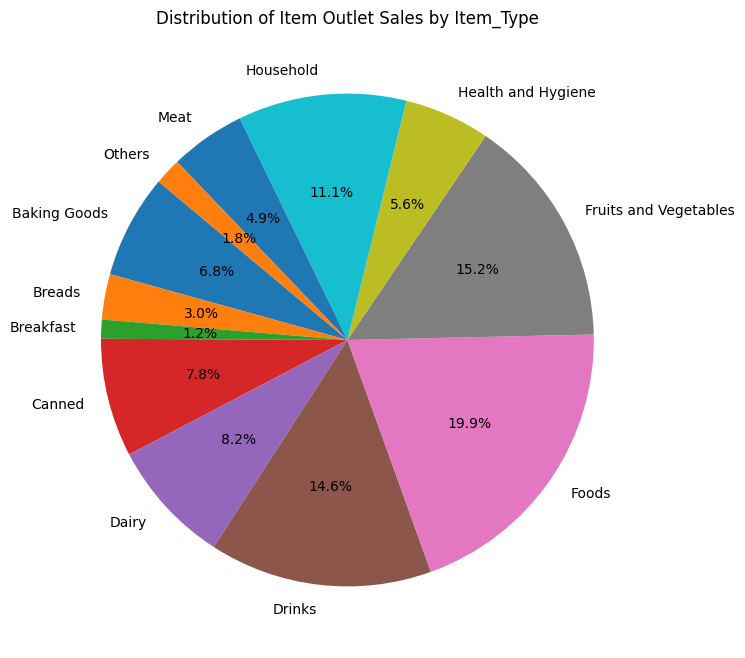

In [32]:
grouped_data = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Item Outlet Sales by Item_Type')
plt.show()

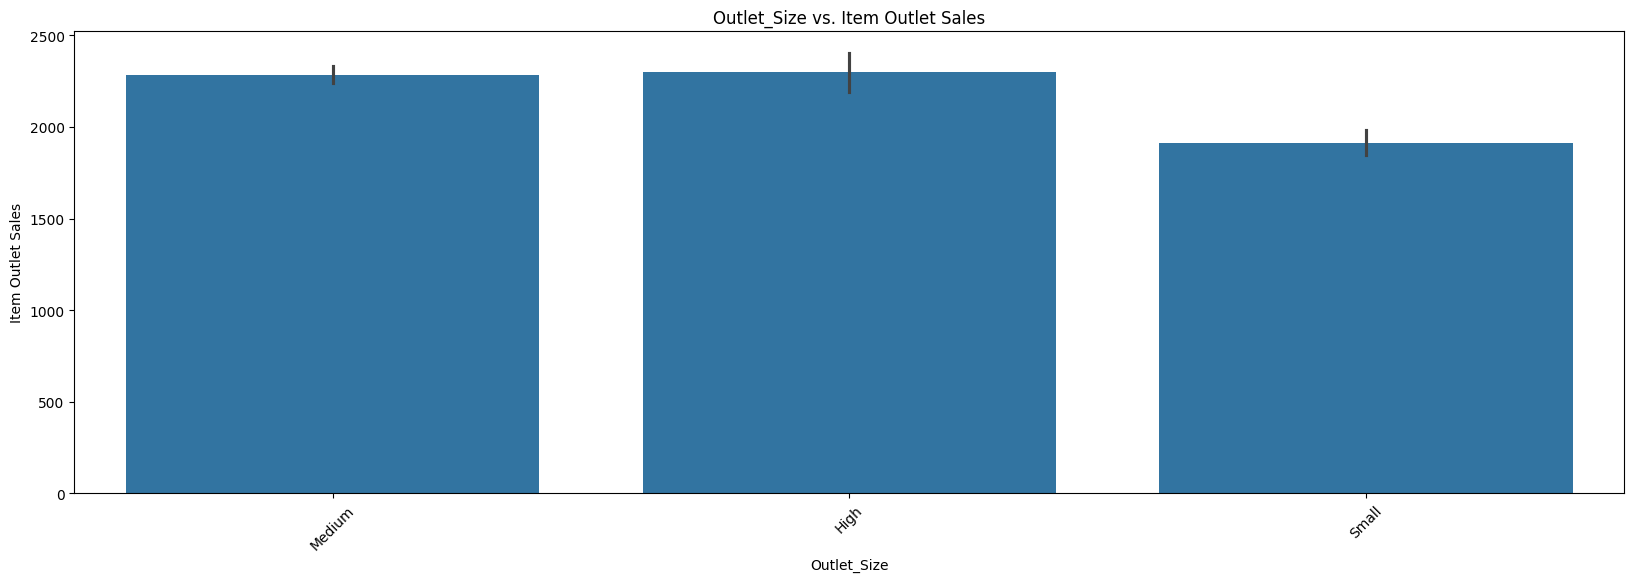

In [33]:
#Outlet_Size vs Item_Outlet_Sales(barplot & pie plot)

plt.figure(figsize=(20, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.title('Outlet_Size vs. Item Outlet Sales')
plt.xlabel('Outlet_Size')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

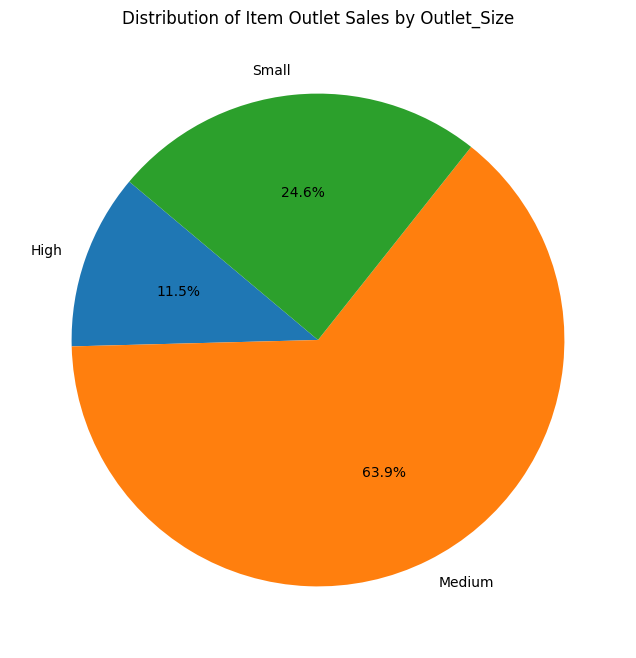

In [34]:
grouped_data = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Item Outlet Sales by Outlet_Size')
plt.show()

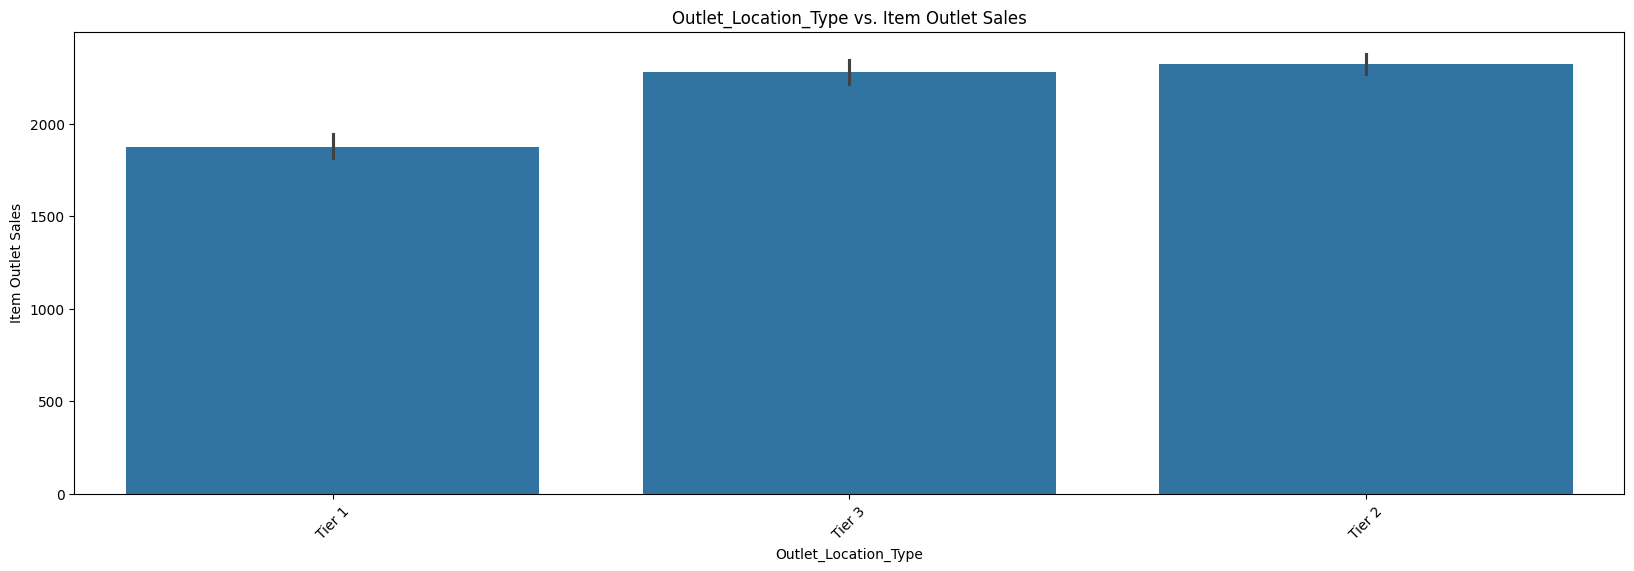

In [35]:
#Outlet_Location_Type vs Item_Outlet_Sales(barplot & pie plot)

plt.figure(figsize=(20, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.title('Outlet_Location_Type vs. Item Outlet Sales')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

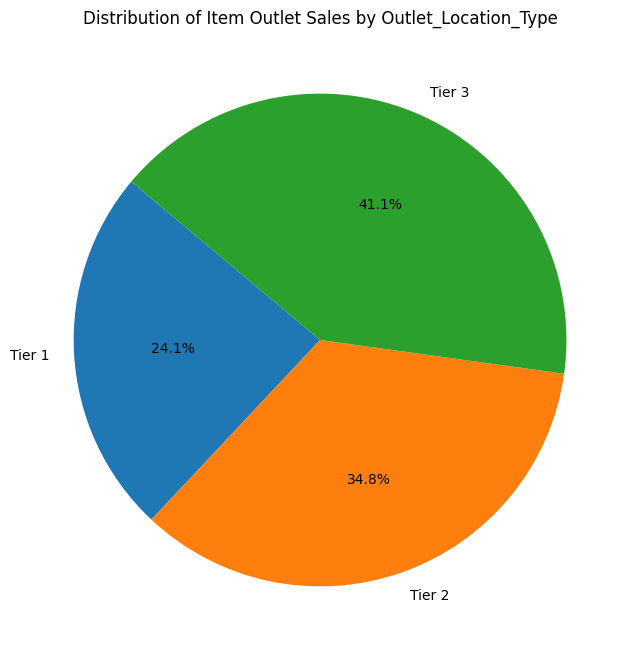

In [36]:
grouped_data = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Item Outlet Sales by Outlet_Location_Type')
plt.show()

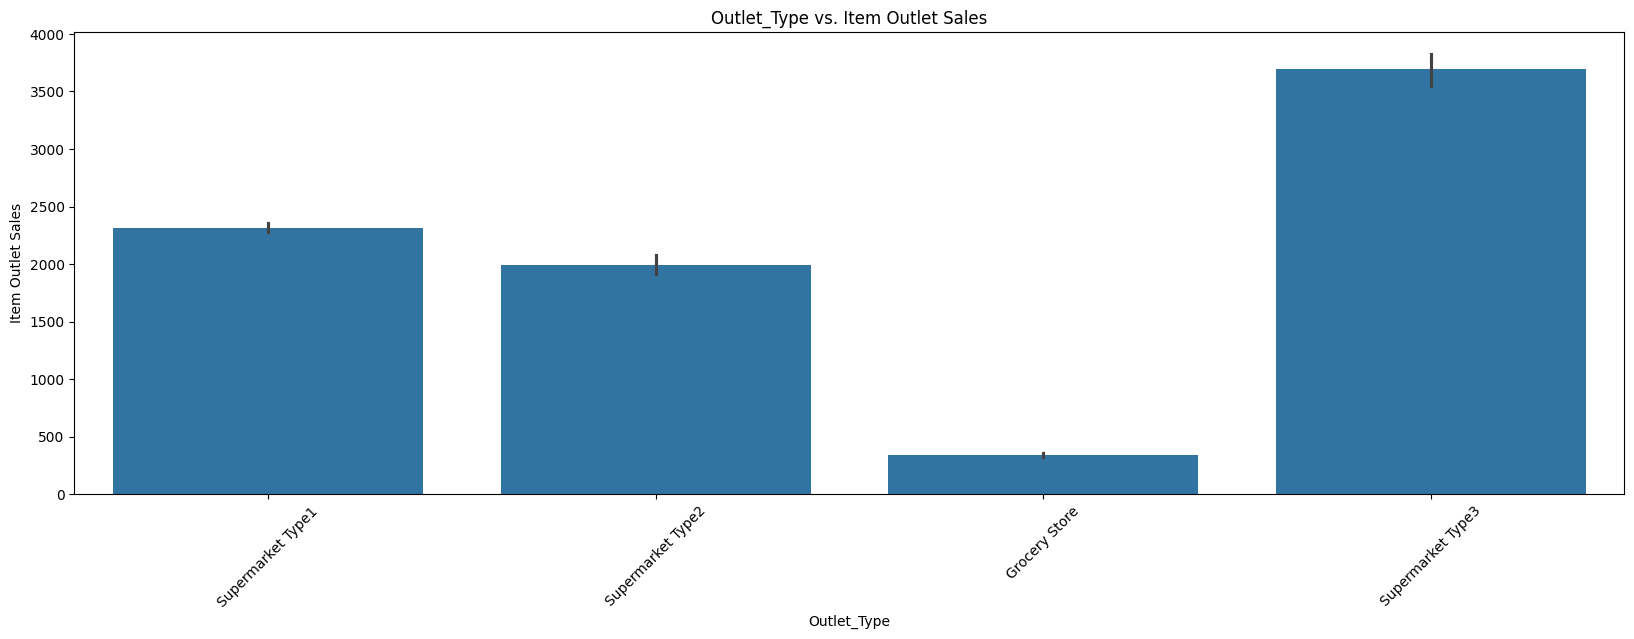

In [37]:
#Outlet_Type vs Item_Outlet_Sales(barplot & pie plot)

plt.figure(figsize=(20, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Outlet_Type vs. Item Outlet Sales')
plt.xlabel('Outlet_Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

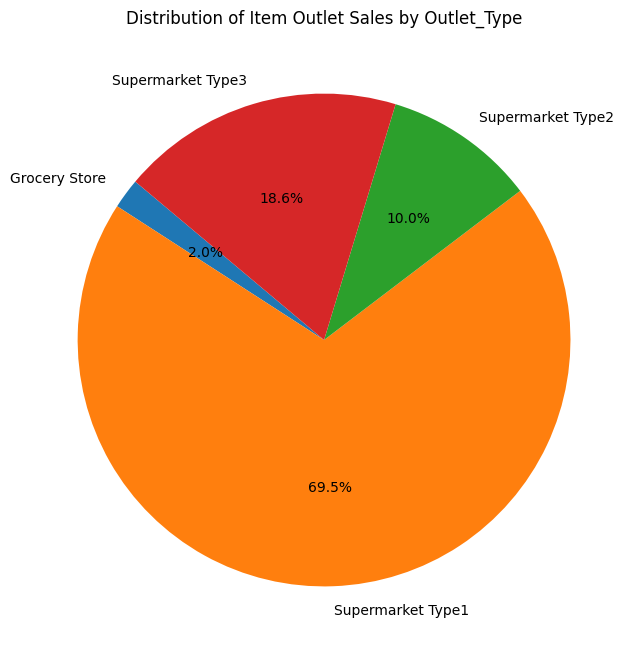

In [38]:
grouped_data = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Item Outlet Sales by Outlet_Type')
plt.show()


Final Report
Item_Identifier column can be dropped as it is an ID.


In [39]:
df1=pd.read_csv("cleaned_data.csv")
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [41]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [46]:
df["Item_Type"].value_counts()

Item_Type
Foods                    1626
Drinks                   1301
Fruits and Vegetables    1232
Household                 910
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Meat                      425
Breads                    251
Others                    169
Breakfast                 110
Name: count, dtype: int64